### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [2]:
### Begin Assignment Here

In [158]:
!git clone https://github.com/VictorKuanglhu/DM2024-Lab1-Homework.git
%cd DM2024-Lab1-Homework

fatal: destination path 'DM2024-Lab1-Homework' already exists and is not an empty directory.
/content/DM2024-Lab1-Homework


## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion

##1. Data Source

Nostalgic Sentiment Analysis of YouTube Comments Data
https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data

##2. Data Preparation

In [3]:
!pip install datasets
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00


In [4]:
# download the nostalgic sentiment analysis dataset
nostalgic_dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
nostalgic_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/978 [00:00<?, ?B/s]

(…)nt_Analysis_of_YouTube_Comments_Data.csv:   0%|          | 0.00/219k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

##3. Data Transformation

In [5]:
# convert the nostalgic_dataset to pd.dataframe
import pandas as pd

X = pd.DataFrame(nostalgic_dataset['train'])

print(f'X lenght:{len(X)}')
X.head(2)

X lenght:1500


sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

In [6]:
# format the X with rename and adding columns
X = X.rename(columns={'sentiment': 'category_name'})
X = X.rename(columns={'comment': 'text'})
X['category'] = X['category_name'].apply(lambda x: 1 if x == 'nostalgia' else 0)

print(f'X lenght:{len(X)}')
X.head(2)

X lenght:1500


category_name                                               text  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1

##4. Data Mining using Pandas

### 4.1 Dealing with Missing Values

In [7]:
# Remove rows with missing values
X.dropna(inplace=True)

print(f'X lenght:{len(X)}')
X.isnull().sum()

X lenght:1500


category_name    0
text             0
category         0
dtype: int64

### 4.2 Dealing with Duplicate Data

In [8]:
# Remove duplicate rows based on all columns
X.drop_duplicates(inplace=True)

print(f'X lenght:{len(X)}')
print(f'duplicate rows:{X.duplicated().sum()}')

X lenght:1499
duplicate rows:0


##5. Data Preprocessing

###5.1 Sampling

In [9]:
# random sample 40%
X_sample = X.sample(n=len(X)*40//100, random_state=42)

print(f'X lenght:{len(X)}')
print(f'X_sample lenght:{len(X_sample)}')

X lenght:1499
X_sample lenght:599


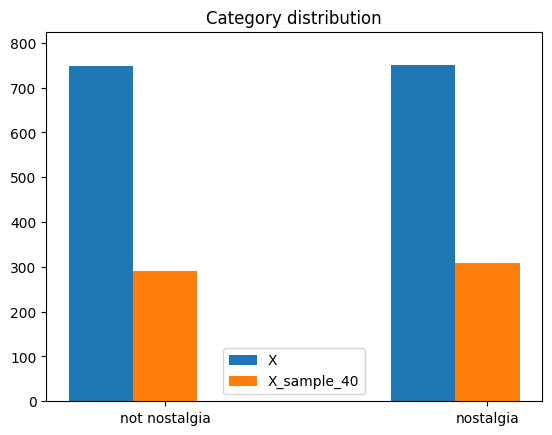

In [10]:
# plot the distribution of the categories in
# the original dataset and the sampled dataset
import matplotlib.pyplot as plt
import numpy as np

categories = set(X['category_name'])
X_distribution = X.category_name.value_counts().reindex(categories)
X_sample_distribution = X_sample.category_name.value_counts().reindex(categories)

X_axis = np.arange(len(X_distribution))

plt.bar(X_axis - 0.1, X_distribution, 0.2, label = 'X')
plt.bar(X_axis + 0.1, X_sample_distribution, 0.2, label = 'X_sample_40')

plt.ylim(0, max(pd.concat([X_distribution, X_sample_distribution]))*1.1)
plt.title('Category distribution')
plt.xticks(X_axis+0.1, X_distribution.index)
plt.legend()
plt.show()

###5.2 Feature Creation

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# use nltk tokenizer to tokenize the text column
X['unigrams'] = X['text'].apply(lambda x: nltk.word_tokenize(x))
X['unigrams'][:2]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
Name: unigrams, dtype: object

###5.3 Feature Subset Selection

In [13]:
# generate a document-term matrix from X text
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [14]:
print(count_vect.get_feature_names_out()[2688])
print(X_counts.shape)
print(count_vect.get_feature_names_out()[0:10])

relaxed
(1499, 3730)
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


<Axes: >

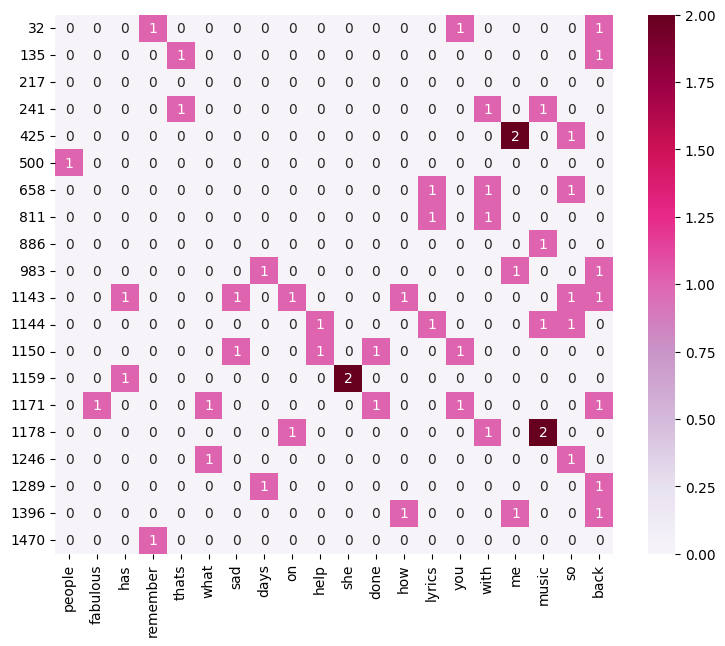

In [15]:
# Visualize the term-document matrix using heatmap
import seaborn as sns

'''
Document Sampling:
  Randomly select 20 unique documents using np.random.choice
  to create a manageable subset for visualization.
'''
doc_sample_num = 20
doc_indices = np.sort(np.random.choice(X_counts.shape[0], doc_sample_num, replace=False))

'''
Term Sampling:
  Calculate the total frequency of each term across the selected documents, focusing on non-zero terms
  Them select the top 30% most frequent terms to prioritize meaningful ones
  Apply systematic sampling with some randomness to ensure an even spread of terms
'''
term_sample_num = 20
term_frequencies_order = np.argsort(X_counts[doc_indices].sum(axis=0).A1)
nonzero_indices = np.where(X_counts[doc_indices].sum(axis=0).A1 != 0)[0]
nonzero_indices_order = term_frequencies_order[np.isin(term_frequencies_order, nonzero_indices)]
nonzero_indices_order_top30 = nonzero_indices_order[int(len(nonzero_indices_order)*0.7):]

sample_step = len(nonzero_indices_order_top30)//term_sample_num
sample_bias = np.random.randint(0,sample_step)
trem_indices = nonzero_indices_order_top30[sample_bias::sample_step][:term_sample_num]

# Visualization:
plot_x = [count_vect.get_feature_names_out()[i] for i in trem_indices]
plot_y = doc_indices
plot_z = X_counts[doc_indices][:,trem_indices].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

<Axes: >

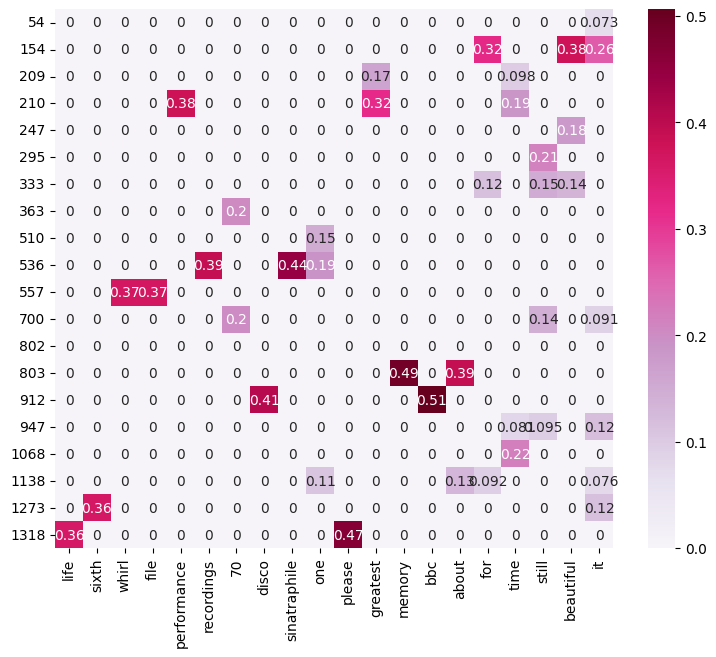

In [290]:
# Visualize the TF-IDF based tdm using heatmap
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Includes unigrams and bigrams
    stop_words='english', # Removes English stop words
    max_df=0.8,      # Ignores overly common words
    min_df=1        # Ignores very rare words
)
tfidf_vectorizer = TfidfVectorizer()   # Initialize the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(X.text)  # Transform text into a TF-IDF feature matrix

'''
Document Sampling:
  Randomly select 20 unique documents using np.random.choice
  to create a manageable subset for visualization.
'''
doc_sample_num = 20
doc_indices = np.sort(np.random.choice(tfidf_matrix.shape[0], doc_sample_num, replace=False))

'''
Term Sampling:
  Calculate the total frequency of each term across the selected documents, focusing on non-zero terms
  Them select the top 30% most frequent terms to prioritize meaningful ones
  Apply systematic sampling with some randomness to ensure an even spread of terms
'''
term_sample_num = 20
term_frequencies_order = np.argsort(tfidf_matrix[doc_indices].sum(axis=0).A1)
nonzero_indices = np.where(tfidf_matrix[doc_indices].sum(axis=0).A1 != 0)[0]
nonzero_indices_order = term_frequencies_order[np.isin(term_frequencies_order, nonzero_indices)]
nonzero_indices_order_top30 = nonzero_indices_order[int(len(nonzero_indices_order)*0.7):]

sample_step = len(nonzero_indices_order_top30)//term_sample_num
sample_bias = np.random.randint(0,sample_step)
trem_indices = nonzero_indices_order_top30[sample_bias::sample_step][:term_sample_num]

# Visualization:
plot_x = [tfidf_vectorizer.get_feature_names_out()[i] for i in trem_indices]
plot_y = doc_indices
plot_z = tfidf_matrix[doc_indices][:,trem_indices].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

###5.4 Atrribute Transformation / Aggregation

####Visualize term frequency distribution

In [16]:
# Compute these frequencies for each term in all documents
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
len(term_frequencies)

3730

In [17]:
# trun term_frequencies to a dataframe
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [18]:
# visualize the word frequency distribution
import plotly.express as px

fig = px.bar(x = count_vect.get_feature_names_out()[:300],
             y = term_frequencies[:300],
             title = 'Word Frequency Distribution')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [19]:
'''
Reduced the visualization data size by selecting terms within the 80%-99% frequency range,
then randomly sampling 150 terms from them. This approach maintains key insights with
minimal computational load and displays significant terms in a concise, informative chart.
'''
top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.80):int(len(term_frequencies)*0.99)]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
plot_y = term_frequencies[top_20_percent_sampling_index]

plot_x = count_vect.get_feature_names_out()[top_20_percent_sampling_index]

fig = px.bar(x = plot_x,
             y = plot_y,
             title = 'Word Frequency Distribution')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [20]:
# Order the index by term frequency
top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.80):]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
sampling_order = top_20_percent_term_index[np.isin(top_20_percent_term_index, top_20_percent_sampling_index)]
plot_y = term_frequencies[np.flip(sampling_order)]

plot_x = count_vect.get_feature_names_out()[sampling_order]

fig = px.bar(x = plot_x,
             y = plot_y,
             title = 'Word Frequency Distribution(order by frequency)')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [110]:
# By using the log-transformed frequency distribution compressed those
# high-frequency terms and allowing lower-frequency terms to stand out more clearly.
import math

top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.5):]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
sampling_order = top_20_percent_term_index[np.isin(top_20_percent_term_index, top_20_percent_sampling_index)]
plot_y = term_frequencies[np.flip(sampling_order)]
# applying log distribution on term_frequencies
plot_y_log = [math.log(i) for i in plot_y]

plot_x = count_vect.get_feature_names_out()[sampling_order]

fig = px.bar(x = plot_x,
             y = plot_y_log,
             title = 'Word Frequency Distribution(log-transformed)')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

####  Finding frequent patterns

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

categories

array(['not nostalgia', 'nostalgia'], dtype=object)

In [39]:
# Display the filtered DataFrame for one of the categories,
category_number=1 # nostalgia categorie
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

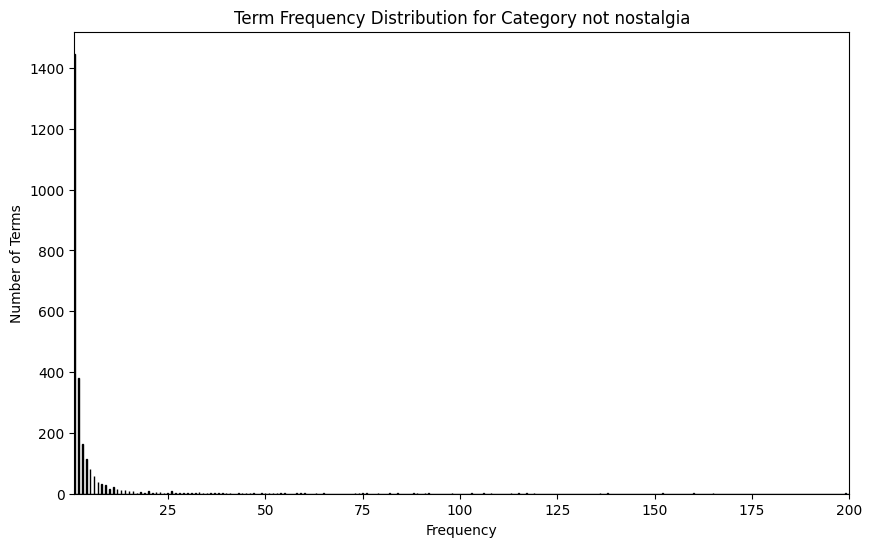

In [32]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [156]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    return term_document_df.drop(columns=words_to_remove), \
          term_document_df.filter(sorted_words.tail(top_n).index), \
          term_document_df.filter(sorted_words.head(bottom_n).index)

# Apply the filtering function to each category
term_document_dfs = {}
top_words_dfs = {}
bottom_words_dfs = {}

for category in categories:
    term_document_dfs[category], top_words_dfs[category], bottom_words_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

term_document_dfs[categories[category_number]]

07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
0     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
1     0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
2     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
3     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
4     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..    ...      ...   
745   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
746   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
747   0   0   0     0   0   1   0   0   0   0  ...   0      0        0   
748   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
749   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

In [ ]:
!pip install chart-studio
from helpers.text_analysis import plot_word_cloud

Nostalgia filtered Words:


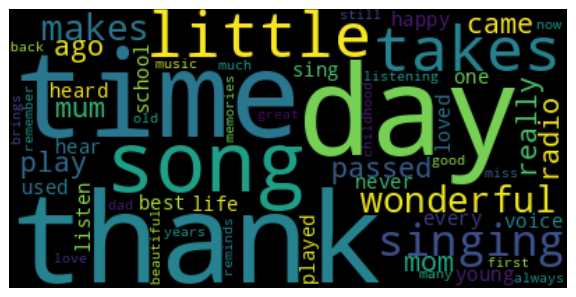

Nostalgia top Words:


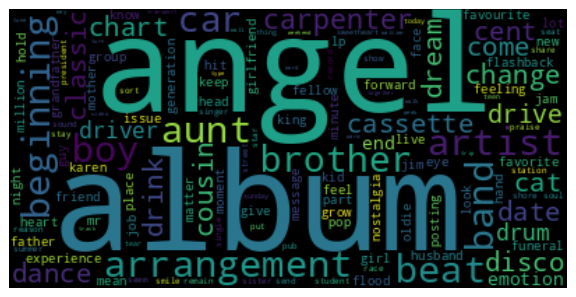

Nostalgia bottom Words:


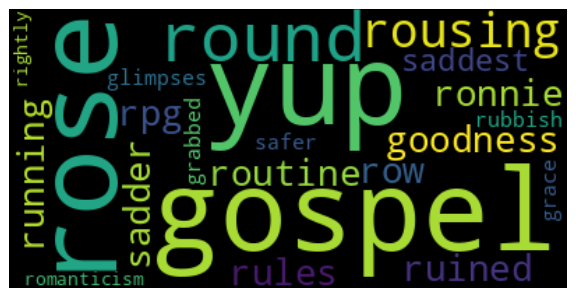

In [184]:
# visualize the "nostalgia" trems
filter_text = ' '.join(top_words_dfs['nostalgia'].columns)
top_text = ' '.join(term_document_dfs['nostalgia'].columns)
bottom_text = ' '.join(bottom_words_dfs['nostalgia'].columns)

print(f"Nostalgia filtered Words:")
plot_word_cloud(filter_text)

print(f"Nostalgia top Words:")
plot_word_cloud(top_text)

print(f"Nostalgia bottom Words:")
plot_word_cloud(bottom_text)

Not_Nostalgia Filtered Words:


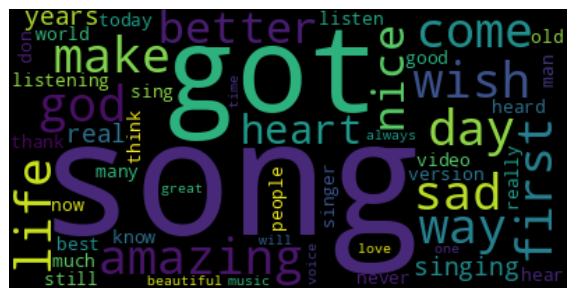

Not_Nostalgia Top Words:


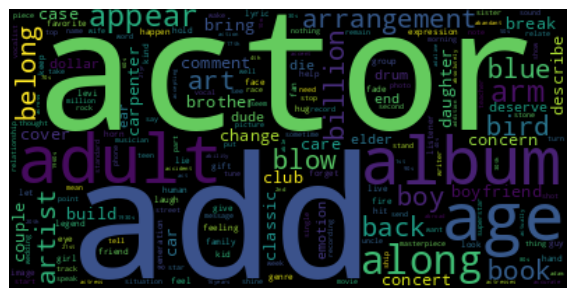

Not_Nostalgia Bottom Words:


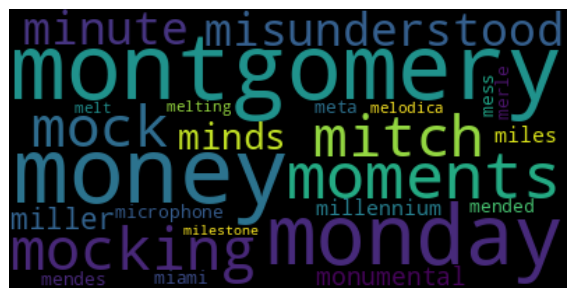

In [185]:
# visualize the "not nostalgia" trems
filter_text = ' '.join(top_words_dfs['not nostalgia'].columns)
top_text = ' '.join(term_document_dfs['not nostalgia'].columns)
bottom_text = ' '.join(bottom_words_dfs['not nostalgia'].columns)

print(f"Not_Nostalgia Filtered Words:")
plot_word_cloud(filter_text)

print(f"Not_Nostalgia Top Words:")
plot_word_cloud(top_text)

print(f"Not_Nostalgia Bottom Words:")
plot_word_cloud(bottom_text)

####Convert our dataframe into a transactional database

In [ ]:
!pip install pami

In [198]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


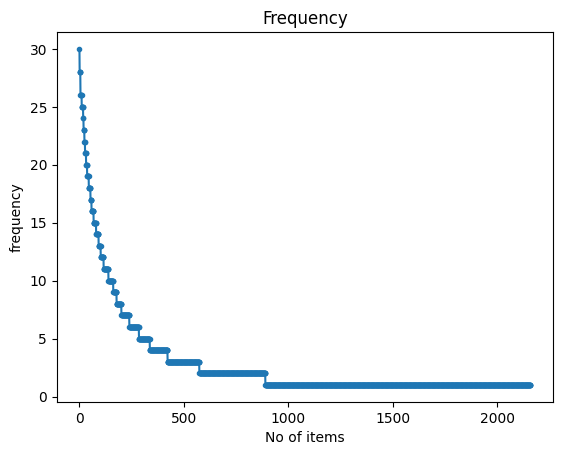

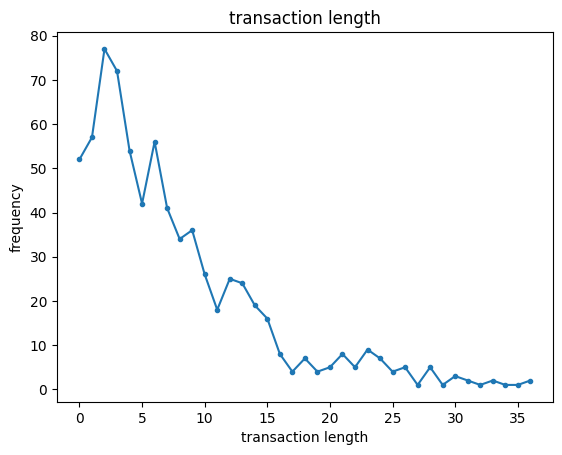

In [199]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


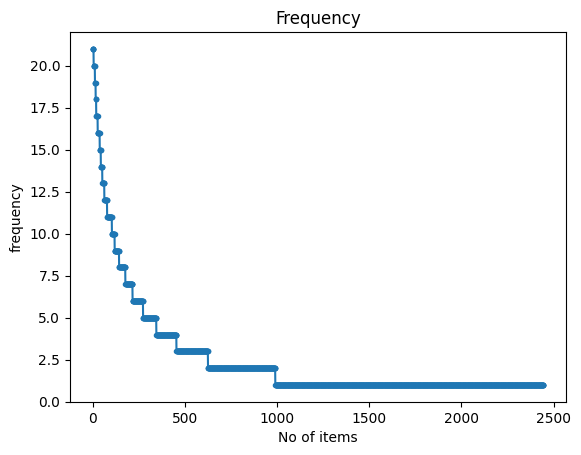

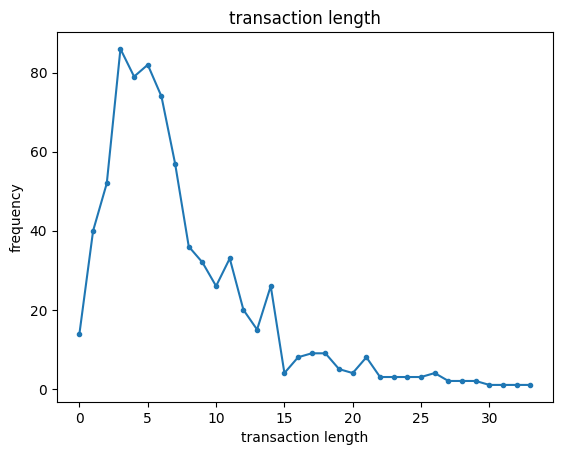

In [200]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

####Generated Frequent patterns

In [242]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 3
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('td_freq_db_nostalgia_minSup4.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 948
Runtime: 0.07902264595031738


Patterns  Support
0           forgot        3
1               mr        3
2       appreciate        3
3            death        3
4        death jim        3
..             ...      ...
943          would       28
944           will       28
945  will favorite        3
946             go       28
947       favorite       30

[948 rows x 2 columns]

In [243]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 3
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

obj2.save('td_freq_db_not_nostalgia_minSup4.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.12111163139343262


Patterns  Support
0       emotional        3
1             fan        3
2              30        3
3        blessing        3
4        december        3
..            ...      ...
725       classic       21
726          them       21
727    them every        4
728        lyrics       21
729  lyrics every        3

[730 rows x 2 columns]

####Filter out and retain only unique patterns across categories

In [244]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

              Patterns  Support
634               will       28
632               ever       28
633              would       28
629               wish       26
618                kid       26
...                ...      ...
420          make them        3
421       hearing away        3
422       missed today        3
424   country favorite        3
1053      lyrics every        3

[1054 rows x 2 columns]
Number of patterns discarded: 624


####Create the term-document matrix based on frequency

In [304]:
# create a term-document matrix
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
tdm_df.iloc[0:3]

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  youth  \
0   0    0    0   0   0    0    0   0     0   0  ...      0         0      0   
1   0    0    0   0   0    0    0   0     0   0  ...      0         0      0   
2   0    0    0   0   0    0    0   0     0   0  ...      0         0      0   

   youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0        0    0    0    0        0      0  
1         0        0    0    0    0        0      0  
2         0        0    0    0    0        0      0  

[3 rows x 3730 columns]

####Create the term-document matrix based on the TF-IDF score


In [340]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'text' column into term-document matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', # Removes English stop words
)
X_tdm_tfidf = tfidf_vectorizer.fit_transform(X['text'])  # X['text'] contains your text data
X_tdm_tfidf = (X_tdm_tfidf > 0).astype(int) # convert X_tdm_tfidf to a 0/1 matrix
terms_tfidf = tfidf_vectorizer.get_feature_names_out()  # Original terms in the vocabulary

# Convert the term-document matrix to a DataFrame for easy merging
tdm_tfidf_df = pd.DataFrame(X_tdm_tfidf.toarray(), columns=terms_tfidf, index=X.index)
tdm_tfidf_df.iloc[0:3]

00  000  045  07  10  100  10m  11  11th  12  ...  youngster  youngsters  \
0   0    0    0   0   0    0    0   0     0   0  ...          0           0   
1   0    0    0   0   0    0    0   0     0   0  ...          0           0   
2   0    0    0   0   0    0    0   0     0   0  ...          0           0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0      0         0        0    0    0    0        0      0  
1      0         0        0    0    0    0        0      0  
2      0         0        0    0    0    0        0      0  

[3 rows x 3485 columns]

In [339]:

X_tdm_tfidf.toarray()[0].sum()

22

In [327]:
(X_tdm_tfidf[1] > 0).astype(int)

<1x3485 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

####Create the pattern matrix

In [306]:
# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

pattern_matrix.iloc[0:3]

Patterns  will  ever  would  wish  kid  such  or  only  could  about  ...  \
0            0     0      0     0    0     0   0     0      0      0  ...   
1            0     1      0     0    1     0   0     0      0      0  ...   
2            0     0      0     0    0     0   0     0      0      0  ...   

Patterns  later year  later has  later been  make cry  make where  make them  \
0                  0          0           0         0           0          0   
1                  0          0           0         0           0          0   
2                  0          0           0         0           0          0   

Patterns  hearing away  missed today  country favorite  lyrics every  
0                    0             0                 0             0  
1                    0             0                 0             0  
2                    0             0                 0             0  

[3 rows x 1054 columns]

####Combining term-document matrix with papattern matrix

In [343]:
# concat origin tdm with pattern matrix
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df.iloc[0:3]

00  000  045  07  10  100  10m  11  11th  12  ...  later year  later has  \
0   0    0    0   0   0    0    0   0     0   0  ...           0          0   
1   0    0    0   0   0    0    0   0     0   0  ...           0          0   
2   0    0    0   0   0    0    0   0     0   0  ...           0          0   

   later been  make cry  make where  make them  hearing away  missed today  \
0           0         0           0          0             0             0   
1           0         0           0          0             0             0   
2           0         0           0          0             0             0   

   country favorite  lyrics every  
0                 0             0  
1                 0             0  
2                 0             0  

[3 rows x 4784 columns]

In [344]:
# concat TF-IDF tdm with pattern matrix
augmented_tfidf_df = pd.concat([tdm_tfidf_df, pattern_matrix], axis=1)
augmented_tfidf_df.iloc[0:3]

00  000  045  07  10  100  10m  11  11th  12  ...  later year  later has  \
0   0    0    0   0   0    0    0   0     0   0  ...           0          0   
1   0    0    0   0   0    0    0   0     0   0  ...           0          0   
2   0    0    0   0   0    0    0   0     0   0  ...           0          0   

   later been  make cry  make where  make them  hearing away  missed today  \
0           0         0           0          0             0             0   
1           0         0           0          0             0             0   
2           0         0           0          0             0             0   

   country favorite  lyrics every  
0                 0             0  
1                 0             0  
2                 0             0  

[3 rows x 4539 columns]

###5.5 Dimensionality Reduction

In [ ]:
!pip install umap-learn

In [246]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

col = ['blue', 'orange']
categories = X['category_name'].unique()

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc='upper right')

In [247]:
# Apply PCA, t-SNE, and UMAP on original tdm
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [248]:
# Apply PCA, t-SNE, and UMAP on tdm concat with pattern matrix
X_pca_tdm_augmented = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_tdm_augmented = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_tdm_augmented = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

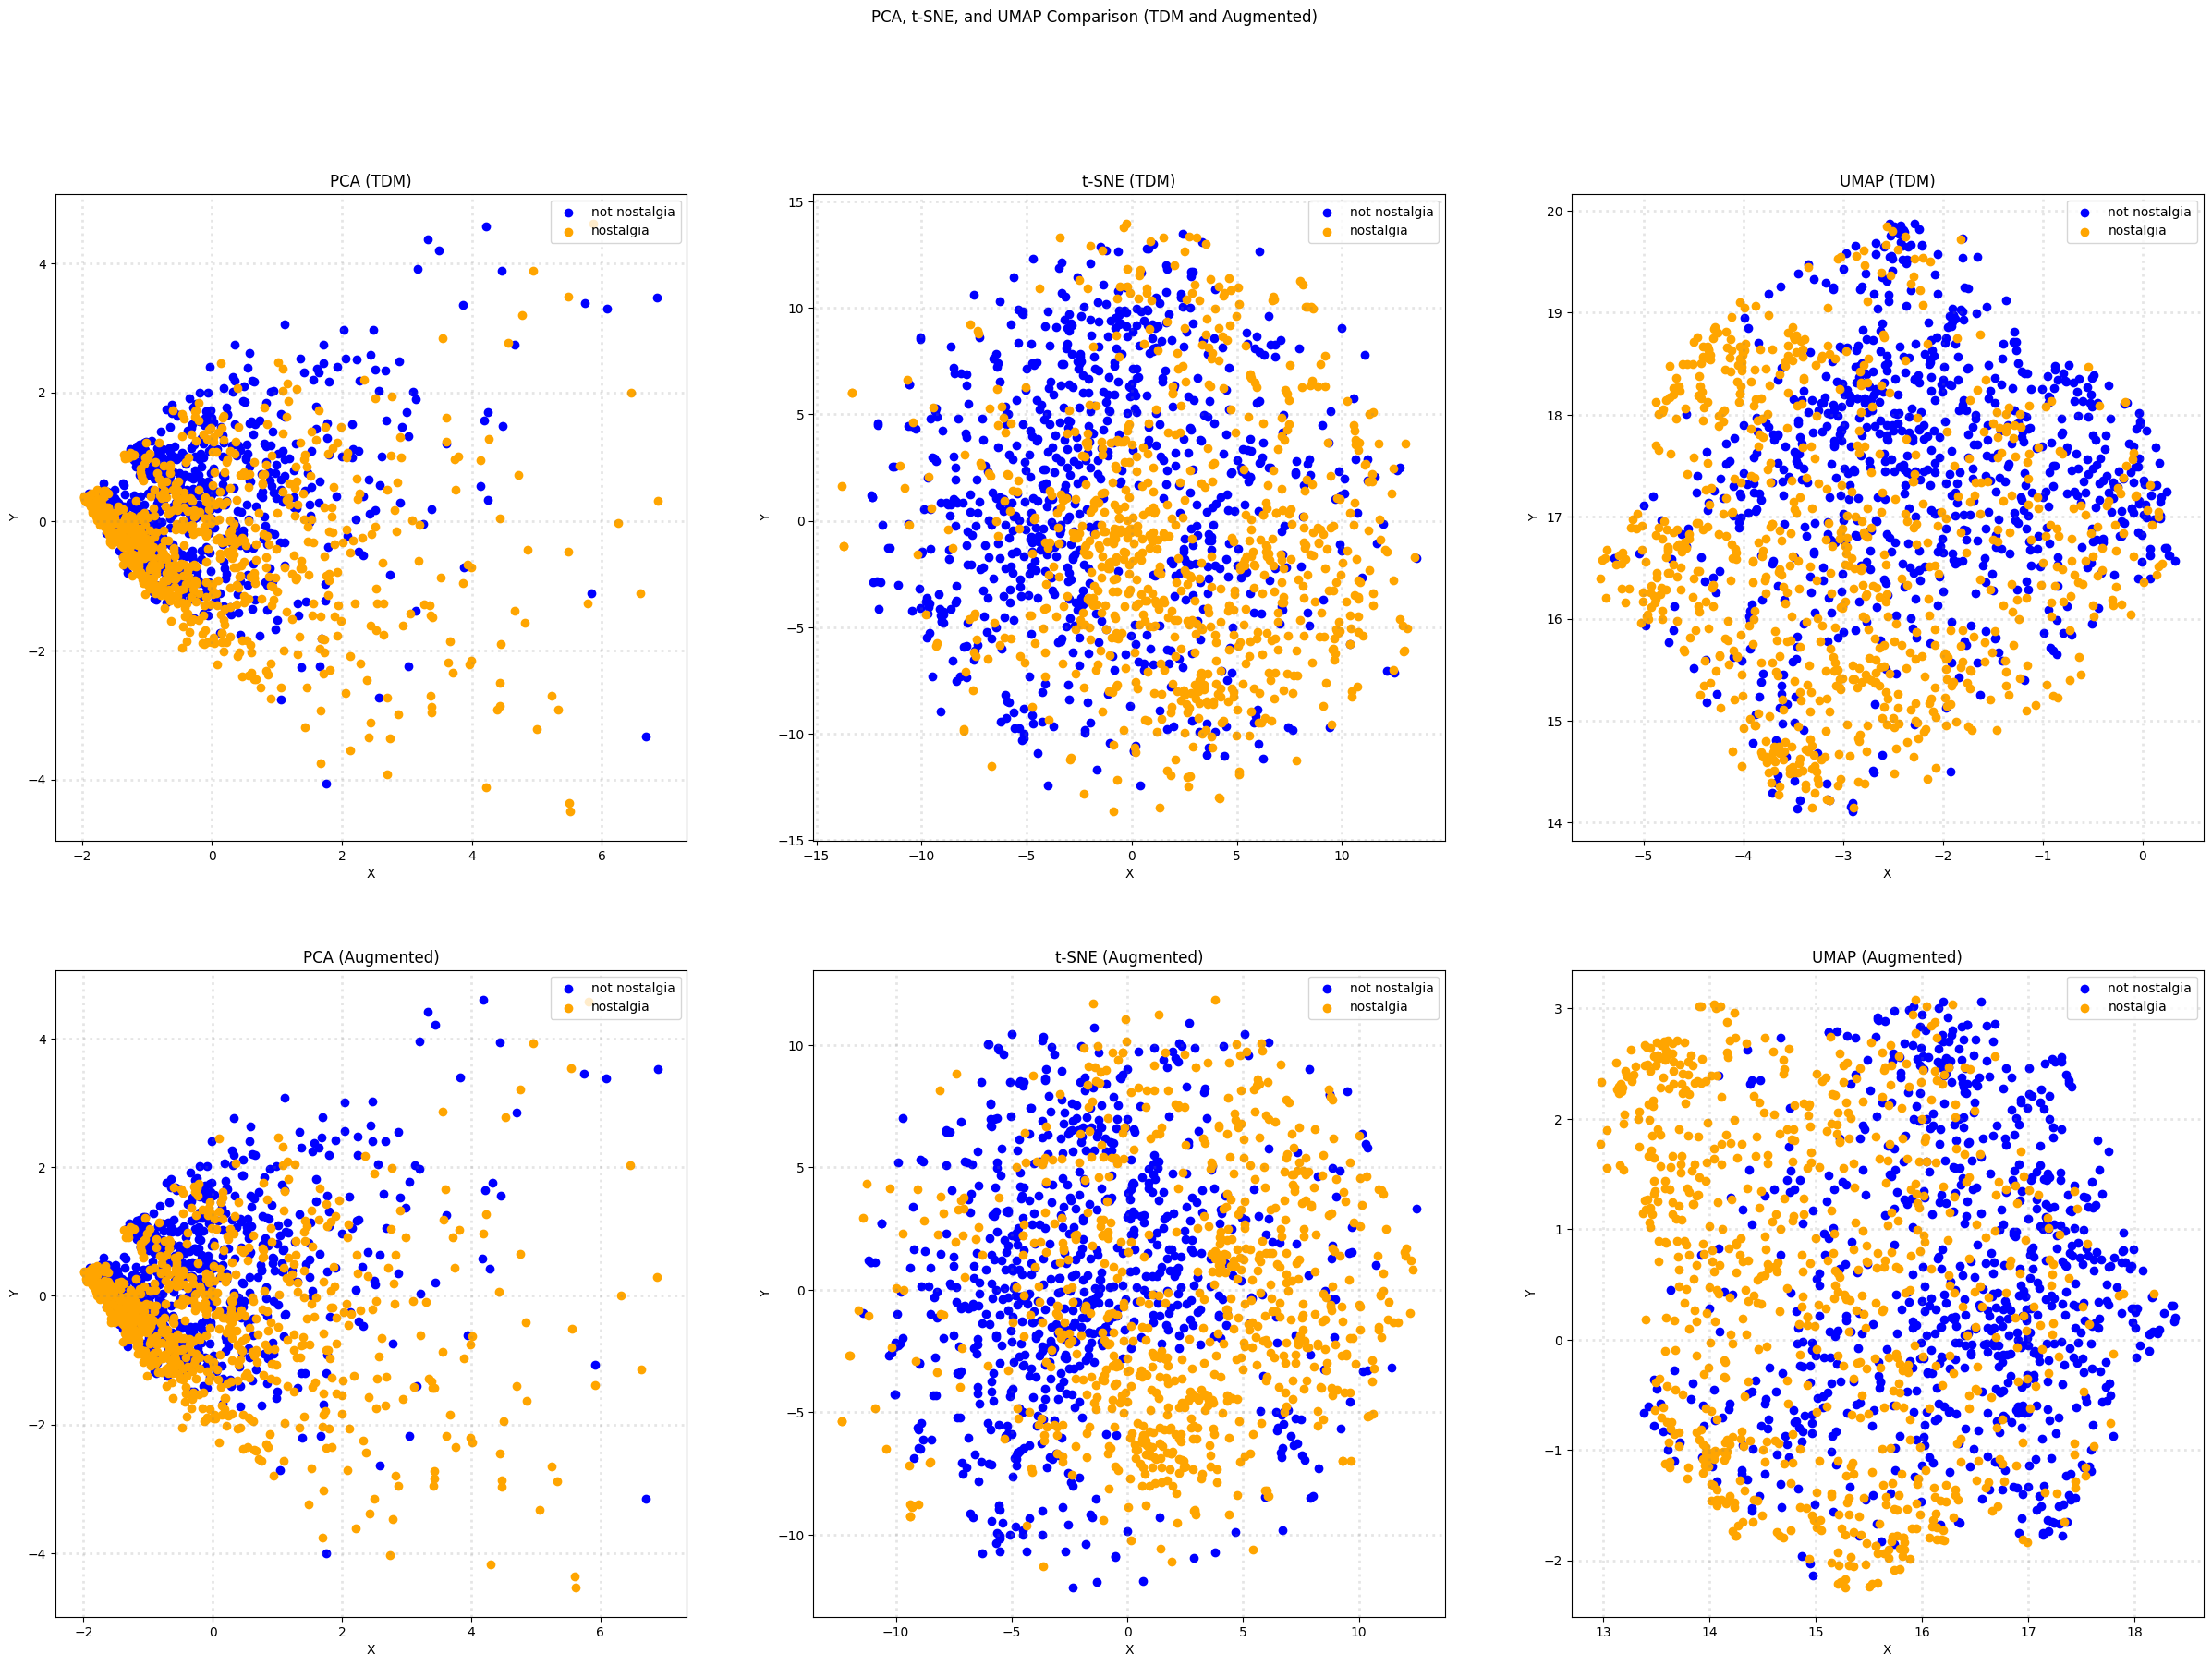

In [251]:
# Plot the results in subplots for different reduction method
fig, axes = plt.subplots(2, 3, figsize=(30, 20))  # Create 6 subplots for PCA, t-SNE, and UMAP with both tdm and augmented data
fig.suptitle('PCA, t-SNE, and UMAP Comparison (TDM and Augmented)')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0, 0], X_pca_tdm, 'PCA (TDM)')
plot_scatter(axes[0, 1], X_tsne_tdm, 't-SNE (TDM)')
plot_scatter(axes[0, 2], X_umap_tdm, 'UMAP (TDM)')

plot_scatter(axes[1, 0], X_pca_tdm_augmented, 'PCA (Augmented)')
plot_scatter(axes[1, 1], X_tsne_tdm_augmented, 't-SNE (Augmented)')
plot_scatter(axes[1, 2], X_umap_tdm_augmented, 'UMAP (Augmented)')

plt.show()

The dimensionality reduction isn't working very well in my experiment.

In [252]:
# 3D dimensionality reduction
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

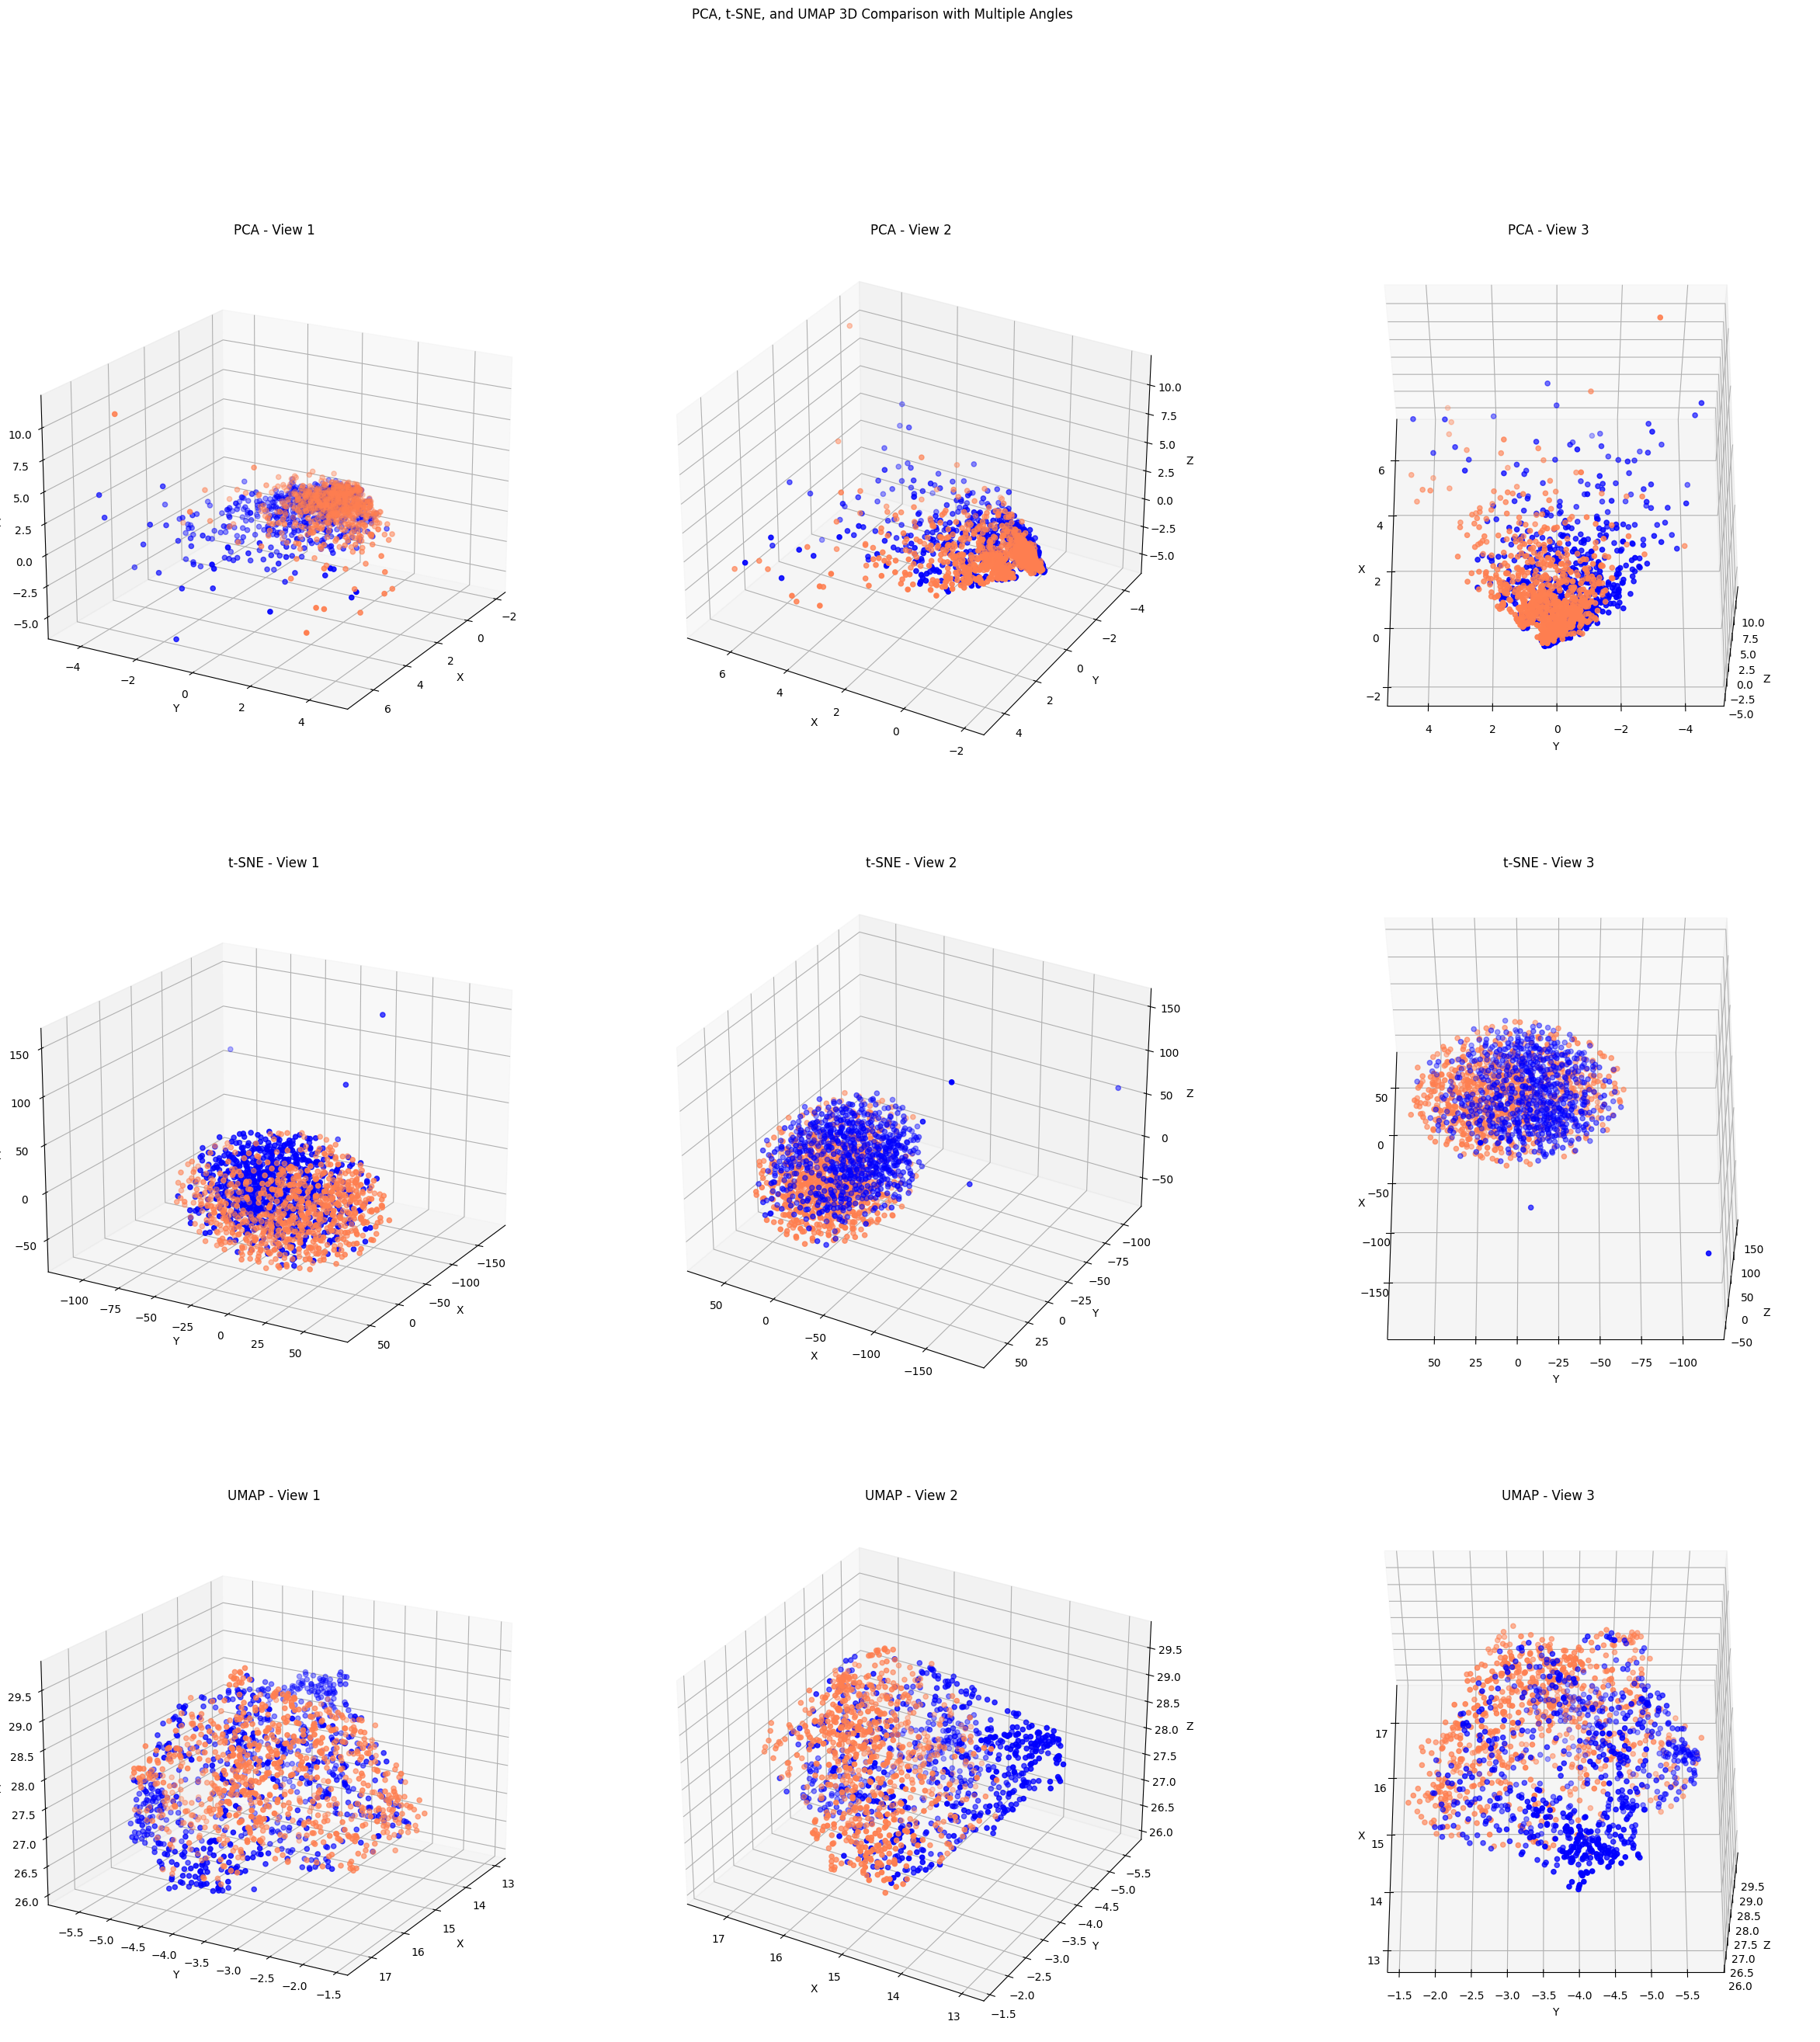

In [256]:
# visualize 3D dimensionality reduction
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison with Multiple Angles')

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Set different viewing angles
angles = [(20, 30), (30, 120), (60, 180)]

# Generate subplots for each method and each angle
methods = [('PCA', X_pca_aug_3d), ('t-SNE', X_tsne_aug_3d), ('UMAP', X_umap_aug_3d)]
for i, (method_name, X_reduced) in enumerate(methods):
    for j, angle in enumerate(angles):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
        plot_3d_scatter(ax, X_reduced, f'{method_name} - View {j+1}')
        ax.view_init(angle[0], angle[1])

plt.show()

###5.6 Discretization and Binarization

There are only two categories in this dataset, so binarization is not necessary.

In [263]:
# just a simple label binarization demonstration.
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
a=[1,2,3,4,5]
mlb.fit(a)
mlb.transform(a).tolist()

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

---

##6. Data Exploration

In [274]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[25]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [275]:
# compare the cosine similarity between 3 sentences
from sklearn.metrics.pairwise import cosine_similarity

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)


# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.228416
Cosine Similarity using count bw 1 and 3: 0.112687
Cosine Similarity using count bw 2 and 3: 0.032174
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


<ipython-input-275-8140c5ec4427>:20: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-275-8140c5ec4427>:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-275-8140c5ec4427>:22: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-275-8140c5ec4427>:24: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing th

##7. Data Classification

In [346]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)
X_train_tfidf_o, X_test_tfidf_o, y_train_tfidf_o, y_test_tfidf_o = train_test_split(tdm_tfidf_df, X['category'], test_size=0.3, random_state=42)
X_train_tfidf_aug, X_test_tfidf_aug, y_train_tfidf_aug, y_test_tfidf_aug = train_test_split(augmented_tfidf_df, X['category'], test_size=0.3, random_state=42)

In [355]:
# Train the Naive Bayes classifier
nb_classifier_o = MultinomialNB()
nb_classifier_o.fit(X_train_o, y_train_o)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Train the TF-IDF matrix with Bernoulli naive Bayes
nb_classifier_tfidf_o = BernoulliNB()
nb_classifier_tfidf_o.fit(X_train_tfidf_o, y_train_tfidf_o)

nb_classifier_tfidf_aug = BernoulliNB()
nb_classifier_tfidf_aug.fit(X_train_tfidf_aug, y_train_tfidf_aug)


# Make predictions on the test set
y_pred_o = nb_classifier_o.predict(X_test_o)
y_pred_aug = nb_classifier_aug.predict(X_test_aug)
y_pred_tfidf_o = nb_classifier_tfidf_o.predict(X_test_tfidf_o)
y_pred_tfidf_aug = nb_classifier_tfidf_aug.predict(X_test_tfidf_aug)

####Evaluate the classifier

In [356]:
# Original TDM Results
print("----- Original TDM -----")
print(f'Accuracy: {accuracy_score(y_test_o, y_pred_o) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test_o, y_pred_o, target_names=target_names, digits=3))

----- Original TDM -----
Accuracy: 86.89%

Classification Report:
                precision    recall  f1-score   support

not nostalgia      0.939     0.779     0.851       217
    nostalgia      0.822     0.953     0.883       233

     accuracy                          0.869       450
    macro avg      0.881     0.866     0.867       450
 weighted avg      0.878     0.869     0.868       450



In [357]:
# Augmented TDM Results
print("----- Augmented TDM -----")
print(f'Accuracy: {accuracy_score(y_test_aug, y_pred_aug) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=3))

----- Augmented TDM -----
Accuracy: 88.00%

Classification Report:
                precision    recall  f1-score   support

not nostalgia      0.936     0.806     0.866       217
    nostalgia      0.840     0.948     0.891       233

     accuracy                          0.880       450
    macro avg      0.888     0.877     0.879       450
 weighted avg      0.886     0.880     0.879       450



In [358]:
# Original TF-IDF Results
print("----- Original TF-IDF -----")
print(f'Accuracy: {accuracy_score(y_test_tfidf_o, y_pred_tfidf_o) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test_tfidf_o, y_pred_tfidf_o, target_names=target_names, digits=3))

----- Original TF-IDF -----
Accuracy: 87.33%

Classification Report:
                precision    recall  f1-score   support

not nostalgia      0.912     0.816     0.861       217
    nostalgia      0.844     0.927     0.883       233

     accuracy                          0.873       450
    macro avg      0.878     0.871     0.872       450
 weighted avg      0.877     0.873     0.873       450



In [359]:
# Augmented TF-IDF Results
print("----- Augmented TF-IDF -----")
print(f'Accuracy: {accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test_tfidf_aug, y_pred_tfidf_aug, target_names=target_names, digits=3))

----- Augmented TF-IDF -----
Accuracy: 88.89%

Classification Report:
                precision    recall  f1-score   support

not nostalgia      0.907     0.857     0.882       217
    nostalgia      0.873     0.918     0.895       233

     accuracy                          0.889       450
    macro avg      0.890     0.888     0.888       450
 weighted avg      0.890     0.889     0.889       450



MultinomialNB usually performs well when working with count data (word frequency). It accounts for frequency differences of words across documents, which can improve classification where word occurrence frequencies are significant.


BernoulliNB, in contrast, is binary-focused and often more robust for cases where word presence/absence (regardless of frequency) is informative, especially in shorter text segments.

## 8.Conclusion

### Improvements in Data Preprocessing

**Text Preprocessing**:  
In the original data preprocessing, there might not be enough attention to steps like tokenization, removing stopwords, or stemming/lemmatization. Adding these steps could really help improve the quality of features, especially for text data, by focusing on the most meaningful parts of each document. Tokenization can break down each sentence into words, while removing stopwords (common words like “the” or “and”) helps focus on words that add more value. Stemming or lemmatization can also make the data more uniform by reducing words to their base forms.

**Dimensionality Reduction**:  
Working with TF-IDF matrices or word frequency vectors can quickly lead to high-dimensional datasets, which means more processing time and possibly overfitting the model. Reducing the dimensions can help speed things up and make the model more generalizable. Using methods like **Truncated SVD** or **PCA** can simplify the data by retaining only the most important features and removing redundant information, which is especially useful for sparse text data matrices. This way, the model doesn’t get overwhelmed by too many features and can learn patterns more efficiently.